# NOTEBOOK INTENDED FOR PRELIMINARY DATA ANALYSIS

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

pd.set_option('display.max_columns', None)

# FIRST LOOK AT DATA

In [ ]:
df_transactions = pd.read_parquet('../../data/part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet')
df_products = pd.read_parquet('../../data/part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet')
df_pdvs = pd.read_parquet('../../data/part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet')

**Summarizing:**
- Around **6.5M rows** estimated for the final dataframe, with around **23 columns**
- Around **14K stores** and **7K products**
- **No issues with duplicates**
- **Few missings**

## Transactions

In [ ]:
# First look at data

df_transactions.head()

,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,0.234375
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,0.810000
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,0.405000
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,0.000000
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,2.279758


In [ ]:
# Dimensionality

print(df_transactions.shape)

(6560698, 11)


In [ ]:
# Check nullable values and percentage of nullable values

print(df_transactions.isnull().sum())

internal_store_id      0
internal_product_id    0
distributor_id         0
transaction_date       0
reference_date         0
quantity               0
gross_value            0
net_value              0
gross_profit           0
discount               0
taxes                  0
dtype: int64


In [ ]:
# Check duplicated

print(df_transactions.duplicated().sum())

0


> No duplicates in Transactions

## PDVs

In [ ]:
# Fist look at data

df_pdvs.head()

,pdv,premise,categoria_pdv,zipcode
0,2204965430669363375,On Premise,Mexican Rest,30741
1,5211957289528622910,On Premise,Hotel/Motel,80011
2,9024493554530757353,Off Premise,Convenience,80751
3,8659197371382902429,On Premise,Restaurant,80439
4,1400854873763881130,On Premise,Restaurant,30093


In [ ]:
# Dimensionality

df_pdvs.shape

(14419, 4)

In [ ]:
# Check nullable values and percentage of nullable values

print(f'Nulls: {df_pdvs.isnull().sum()}')

Nulls: pdv              0
premise          0
categoria_pdv    0
zipcode          0
dtype: int64


In [ ]:
# Check duplicated

print(df_pdvs.duplicated().sum())

0


## Products

In [ ]:
# First look at data

df_products.head()

,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
0,2282334733936076502,Distilled Spirits,JOSEPH CARTRON CAFÉ LIQUEUR,Distilled Spirits,Core,Liqueurs & Cordials,Joseph Cartron Cafe,Spiribam
1,6091840953834683482,Distilled Spirits,SPRINGBANK 18 YEAR SINGLE MALT 700ML,Distilled Spirits,Specialty,Scotch Whisky,Springbank 18 Year Single Malt,Pacific Edge Wine & Spirits
2,1968645851245092408,Distilled Spirits,J BRANDT TRIPLE SEC 12/750ML 30PF,Distilled Spirits,Private Label,Liqueurs & Cordials,J Brandt Triple Sec,Sazerac Spirits
3,994706710729219179,Draft,REFORMATION CASHMERE IPA 1/4 KEG,Draft,In&Out,Other Draft,Reformation Cashmere Fresh Hop IPA,Reformation Brewery
4,9209550539540384349,Non-Alcohol,HELLA MOSCOW MULE 750ML,Non Alcohol,Core,Mixers,Hella Bitters Bloody Mary,Hella Bitter Llc


In [ ]:
# Dimensionality

df_products.shape

(7092, 8)

In [ ]:
# Check nullable values and percentage of nullable values

print(f'Nulls: {df_products.isnull().sum()}')

Nulls: produto            0
categoria          0
descricao          0
tipos              0
label           1473
subcategoria      32
marca              0
fabricante         0
dtype: int64


In [ ]:
# Check duplicated

print(df_products.duplicated().sum())

0


### Understanding what samples have missing values

In [ ]:
df_products[df_products.label.isnull()].sample(n=5)

,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
4028,2836397490014540131,Package,WILD CIDER CO PINEAPPLE 6/4 CN,Package,None,Other Package,Wild Cider Pineapple,Wild Cider Co
5142,6852237411922931434,Distilled Spirits,HARTLEY PINEAPPLE BRANDY 12/750ML 54PF,Distilled Spirits,None,Brandy / Cognac,Hartley's Pineapple Brandy,Sazerac Spirits
5619,108051663137041773,Package,MARBLE BREWERY CERVEZA LAGER 4/6 CN,Package,None,Lager,Marble Brewery Cerveza Lager,Marble Brewery
966,1161671935410251884,Distilled Spirits,YUKON JACK WHISKEY APPLE 12/750ML 100PF,Distilled Spirits,None,Liqueurs & Cordials,Yukon Jack Canadian Whiskey Honey,Sazerac Spirits
1131,2686103274351178965,Package,GOOSE BOURBON COUNTY STOUT LOW 6/4/12 NR 2022,Package,None,Stout & Porter,Goose Island Bourbon County Stout Low,AB Anheuser Busch Inc


In [ ]:
df_products[df_products.subcategoria.isnull()].sample(n=5)

,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
1579,7666015342543918305,Draft,NB VOODOO RANGER JUICE FORCE IPA 1/6 KEG,Draft,Core,None,New Belgium Voodoo Ranger Juice Force IPA,NB New Belgium
3721,1219077194660596578,Tobacco,VLN MENTHOL KING CIGARETTES 10/20C,Tobacco,Core,None,VLN Menthol King Cigarettes,NASCO Products
3464,987571127760142523,Draft,SOUTHERN BREWING CO 7AM 1/2 KEG,Draft,Core,None,Southern Brewing Company 7am,Southern Brewing Co
242,9174279463424703825,Draft,REFORMATION WET HOP IPA 1/4 KEG,Draft,In&Out,None,Reformation Wet Hop IPA,Reformation Brewery
6153,8766784970677530986,Draft,SLOW POUR PEACHIN TO THE CHOIR 1/2 KEG,Draft,In&Out,None,Slow Pour Peachin' To The Choir,Slow Pour Brewing Co


In [ ]:
df_products[df_products.label.isnull() & df_products.subcategoria.isnull()].sample(n=5)

,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
4813,2415683465333399935,Draft,FOUR PEAKS KILT LIFTER ALE 1/6 KEG,Draft,None,None,Four Peaks Kilt Lifter,AB Anheuser Busch Inc
5982,3983284799241546141,Draft,MARBLE BREWERY RED ALE 1/6 KEG,Draft,None,None,Marble Brewery Red Ale,Marble Brewery
3664,1241852778522241988,Draft,BLACK TOOTH SADDLE BRONC BROWN 1/2 BBL,Draft,None,None,Black Tooth Saddle Bronc Brown,Black Tooth Brewing Company
914,8785300213971216422,Draft,10 BARREL SASQUATCH GOLDEN ALE 1/2 KEG,Draft,None,None,10 Barrel Sasquatch Golden Ale,Tilray Brands
6143,2802118675759910376,Draft,FOUR PEAKS KILT LIFTER ALE 1/2 KEG,Draft,None,None,Four Peaks Kilt Lifter,AB Anheuser Busch Inc


---

# PRELIMINARY DESCRIPTIVE DATA ANALYSIS

## Bring all together

In [ ]:
df = df_transactions.set_index("internal_store_id").join(
    other=df_pdvs.set_index("pdv"),
    how='left'
).reset_index().set_index("internal_product_id").join(
    other=df_products.set_index("produto"),
    how='left'
).reset_index()

In [ ]:
df.sample(n=5)

,internal_product_id,internal_store_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes,premise,categoria_pdv,zipcode,categoria,descricao,tipos,label,subcategoria,marca,fabricante
2896521,1152772499033912340,2382490111828240860,4,2022-11-16,2022-11-01,7.0,165.143997,149.185688,40.069689,6.65,15.958306,Off Premise,Grocery,30701.0,Package,BUD LIGHT 2/12/12 CN,Package,Core,Lager,Bud Light,AB Anheuser Busch Inc
1032869,328903483604537190,7497757358670900002,4,2022-06-20,2022-06-01,1.0,35.599998,32.631565,10.565565,0.00,2.968435,Off Premise,Package/Liquor,30360.0,Package,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc
4393013,8988637221428669939,5361546832813407232,7,2022-06-14,2022-06-01,1.0,32.049999,31.869999,6.710999,5.10,0.180000,Off Premise,Package/Liquor,80459.0,Package,KONA BIG WAVE 4/6/12 LNNR,Package,Core,Ale,Kona Big Wave Golden Ale,AB Anheuser Busch Inc
4768253,2275860699616519509,4067606261221511699,8,2022-09-26,2022-09-01,1.0,33.450001,33.270000,11.960000,0.00,0.180000,Off Premise,Package/Liquor,81005.0,Package,FRANZISKANER WEISSBIER NATURTRUB 4/6/12 LNNR,Package,None,Wheat Beer,Franziskaner Weissbier Naturtrub Hefe-Weissbier,AB Anheuser Busch Inc
1337407,519576013096278235,1066983578181554541,4,2022-06-20,2022-06-01,2.0,40.439999,40.439999,14.039999,0.00,0.000000,Off Premise,Convenience,30012.0,Non-Alcohol,ESSENTIA WATER 12/1 LTR,Non Alcohol,Core,Water,Essentia Water,Essentia Water LLC


In [ ]:
df.shape

(6560698, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560698 entries, 0 to 6560697
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   internal_product_id  object 
 1   internal_store_id    object 
 2   distributor_id       object 
 3   transaction_date     object 
 4   reference_date       object 
 5   quantity             float64
 6   gross_value          float64
 7   net_value            float64
 8   gross_profit         float64
 9   discount             float64
 10  taxes                float64
 11  premise              object 
 12  categoria_pdv        object 
 13  zipcode              float64
 14  categoria            object 
 15  descricao            object 
 16  tipos                object 
 17  label                object 
 18  subcategoria         object 
 19  marca                object 
 20  fabricante           object 
dtypes: float64(7), object(14)
memory usage: 1.0+ GB


**Summarizing Numeric Description:**
- **quantity:** mean around **8 products** with a **80 standard deviation**, very high variance, with **negative values** and **very high values after percentile 75%**
- The other values related with the quantity (gross value/profit, net value, discount, and taxes) have the same tendency

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,6560698.0,8.125893,80.493873,-1530.000000,1.000000,2.000000,4.000000,94230.000000
gross_value,6560698.0,122.751233,866.426496,-42672.898438,28.035000,42.099998,92.000000,604173.917786
net_value,6560698.0,119.123296,865.175682,-39848.000046,27.110323,40.770485,87.879002,604173.917786
gross_profit,6560698.0,21.930921,232.646984,-274396.000000,7.140242,10.510241,21.732000,274416.000000
discount,6560698.0,27.666835,384.762433,-13096.799805,0.000000,2.300000,8.700000,240082.965628
taxes,6560698.0,3.627938,11.309847,-4099.408691,0.180000,0.540000,3.039677,2073.237549
zipcode,6515116.0,58647.896488,24893.188584,8107.000000,30161.000000,80022.000000,80501.000000,90920.000000


**Summarizing Categorical Description:**
- All categorical variables have a low number of unique values, except for the products and stores ids, transaction_date, descricao and marca.
- **internal_store_id:** there are more stores in the sales table than in the stores dimension which register the existing stores, suggesting the operation of stores not registered in the system
- **transaction_date and reference_date:** there is huge amounts of sales in september (investigate)
- **premise:** highly umbalanced for **Off Premise**
- **categoria_pdv:** highly umbalanced for **Convenience**
- **categoria:** highly umbalanced for **Package**
- **tipos:** highly umbalanced for **Package**, this describes a little bit more the categories than **categoria**, this two are someway redundant
- **label:** highly umbalance for **Core**
- **subcategoria:** highly umbalance for **Larger**
- **marca:** highly umbalance for **Bug Light**
- **fabricante:** highly umbalance for **AB Anheuser Busch Inc**

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
internal_product_id,6560698,7092,4623814317972718932,108018
internal_store_id,6560698,15086,6421526591548961726,9657
distributor_id,6560698,8,4,2842086
transaction_date,6560698,365,2022-09-11,306557
reference_date,6560698,12,2022-09-01,825790
premise,6515116,2,Off Premise,5823678
categoria_pdv,6515116,54,Convenience,2126380
categoria,6560698,7,Package,4625080
descricao,6560698,7092,BUD LIGHT 4/6/12 LN,108018
tipos,6560698,22,Package,4547759


In [ ]:
# Missing values counting

(df.isnull().sum()*100 / df.shape[0]).round(2)

,0
internal_product_id,0.00
internal_store_id,0.00
distributor_id,0.00
transaction_date,0.00
reference_date,0.00
quantity,0.00
gross_value,0.00
net_value,0.00
gross_profit,0.00
discount,0.00


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.categoria_pdv.isnull()].sample(n=5)

,internal_product_id,internal_store_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes,premise,categoria_pdv,zipcode,categoria,descricao,tipos,label,subcategoria,marca,fabricante
889222,5055088693746995746,2275725734491727082,7,2022-12-23,2022-12-01,0.0,0.0,0.0,-0.01006,0.0,0.0,NaN,NaN,NaN,Distilled Spirits,99 BLUE RASPBERRIES 10/12/50ML 99PF,Allocated Spirits,None,Liqueurs & Cordials,99 Blue Raspberries,Sazerac Spirits
5809313,4353552881410365573,702580714442067525,10,2022-01-20,2022-01-01,0.0,0.0,0.0,-0.01200,0.0,0.0,NaN,NaN,NaN,Package,NATURAL LIGHT 2/15/12 CN,Package,Core,Lager,Natural Light,AB Anheuser Busch Inc
3336407,4913890621258584650,7015121682835447825,8,2022-08-18,2022-08-01,0.0,0.0,0.0,14.70800,0.0,0.0,NaN,NaN,NaN,Package,BUSCH LIGHT 15/25 CN,Package,Core,Lager,Busch Light,AB Anheuser Busch Inc
2926317,4974205226846185245,6421526591548961726,4,2022-10-11,2022-10-01,0.0,0.0,0.0,-0.01250,0.0,0.0,NaN,NaN,NaN,Package,NATURAL ICE 2/15/12 CN,Package,Core,Lager,Natural Ice,AB Anheuser Busch Inc
5808933,4997142770194611989,2729990452775663240,5,2022-06-24,2022-06-01,0.0,0.0,0.0,-0.01200,0.0,0.0,NaN,NaN,NaN,Package,STELLA ARTOIS SOLSTICE 2/12/11.2 LN,Package,None,Lager,Stella Solstice Lager,AB Anheuser Busch Inc


## Granularity

**Note:** huge number (5,516,388) of item-store combinations which occur more than once

In [ ]:
df[['internal_product_id', 'internal_store_id']].duplicated().sum()

np.int64(5516388)

## Sazonality on number of Transactions

**Note:** high peak in September 2022 for number of transactions

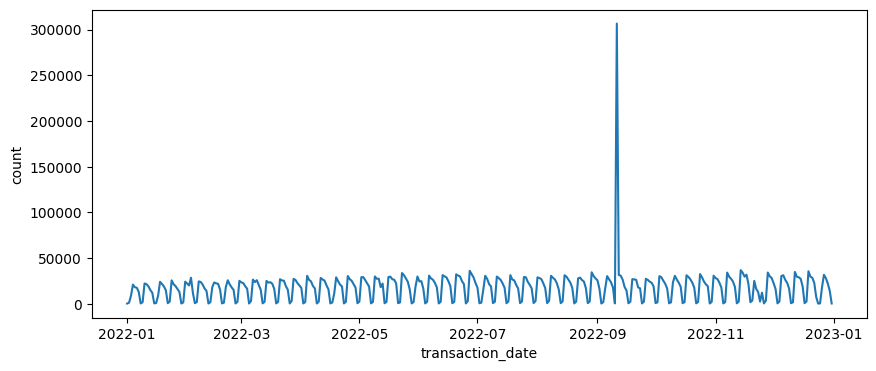

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(df.value_counts('transaction_date').sort_index());

## Sazonality on amount sold


**Note:** high peak in September 2022 is intensified when looking for quantity sold

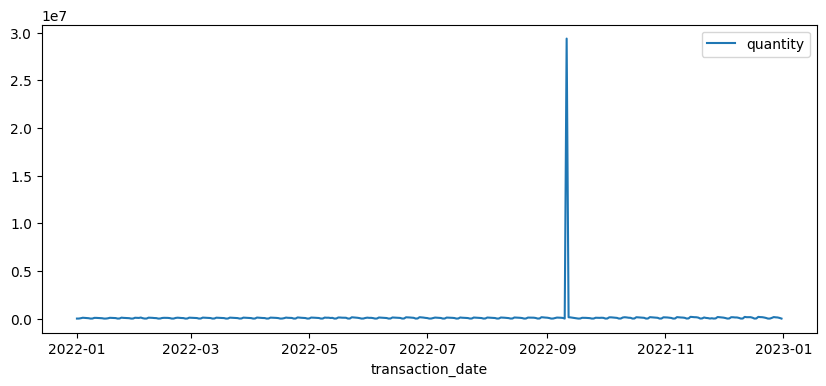

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(df.groupby('transaction_date').agg({
    'quantity': 'sum'
}).sort_index());

## Volume of transactions per day of week

**Note:** from Tuesday to Thursday represents the days with most sales

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [ ]:
df['weekday'] = df['transaction_date'].dt.weekday
df['day_name'] = df['transaction_date'].dt.day_name()

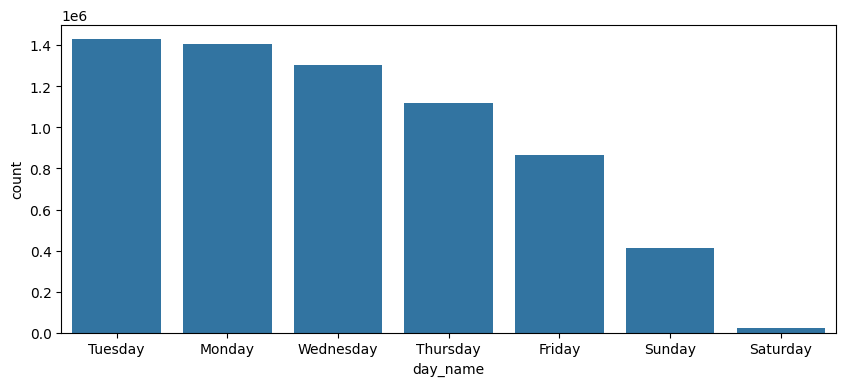

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(df.value_counts('day_name'));

## Checking out the outlier values

**Notes:**
- high peak in **11th September 2022**
- too much products and stores compared to the remainder
- the most sold products in this period are **Whiskey drinks**

In [ ]:
df.value_counts('transaction_date').head()

,count
transaction_date,
2022-09-11,306557
2022-11-14,36737
2022-06-27,36072
2022-12-19,35519
2022-12-12,34799


In [ ]:
df[df.transaction_date == '2022-09-11'].value_counts('internal_store_id').head()

,count
internal_store_id,
4969344191199833269,904
4374038751643985193,505
8723723113467008071,475
3025867614395044464,470
6491855528940268514,467


In [ ]:
df[df.transaction_date == '2022-09-11'].value_counts('internal_product_id').head()

,count
internal_product_id,
6504514533420270914,3226
3620674245436818138,2812
2000299989413890957,2397
4227518894601953647,2367
2811937796518769916,2355


In [ ]:
df[df.transaction_date == '2022-09-11'].value_counts(['internal_product_id', 'descricao', 'marca']).head(10)

,,,count
internal_product_id,descricao,marca,
6504514533420270914,FIREBALL 12/1L 66PF,Fireball Cinnamon Whiskey,3226
3620674245436818138,BUFFALO TRACE BOURBON 12/750ML 90PF,Buffalo Trace Kentucky Straight Bourbon Whiskey,2812
2000299989413890957,EAGLE RARE SINGLE BARREL BOURBON 6/750ML 90PF,Eagle Rare Single Barrel Kentucky Straight Bourbon Whiskey,2397
4227518894601953647,BUFFALO TRACE BOURBON 12/1L 90PF,Buffalo Trace Kentucky Straight Bourbon Whiskey,2367
2811937796518769916,BLANTON'S BOURBON 6/750ML 93PF,Blanton Kentucky Straight Bourbon Whiskey,2355
977091058156188070,TUACA LIQUEUR 12/1L 70PF,Tuaca Liqueur Original,2154
2866058112054092230,MR BOSTON PEACH SCHNAPPS 12/1L 30PF,Mr. Boston Peach Schnapps,1991
4051297824522998476,PEYCHAUD'S BITTERS 12/5OZ 70PF,Peychaud's Aromatic Cocktail Bitters,1964
4901841959266152685,TUACA LIQUEUR 12/750ML 70PF,Tuaca Liqueur Original,1929


In [ ]:
top10_products_outlier = df[
    df.transaction_date == '2022-09-11'
].value_counts(
    ['internal_product_id']
).reset_index()[
    ['internal_product_id']
].values[:10].reshape(10).tolist()

In [ ]:
df[(df.internal_product_id.isin(top10_products_outlier)) & (df.transaction_date < '2022-09-11')]

,internal_product_id,internal_store_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes,premise,categoria_pdv,zipcode,categoria,descricao,tipos,label,subcategoria,marca,fabricante,weekday,day_name


> The top 10 products of the day with overwhelming sales amount are releases with high expectations that lead to a high sales peak. These products have never appeared before this date.

# EXPLORATORY DATA ANALYSIS

## Pareto Analysis

In [ ]:
def generate_pareto_chart(df, column, k, value_column=None):
    """
    Generates a Pareto chart for the top K categories of a given column,
    using either counts or the sum of a specified value column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to analyze.
        k (int): The number of top categories to display.
        value_column (str, optional): The name of the column to aggregate
                                      (e.g., 'quantity', 'gross_value').
                                      If None, the chart is based on counts.
    """
    if value_column:
        pareto_data = df.groupby(column)[value_column].sum().sort_values(ascending=False).head(k)
    else:
        pareto_data = df[column].value_counts().sort_values(ascending=False).head(k)

    pareto_data_percentage = (pareto_data / pareto_data.sum()).cumsum()

    fig, ax1 = plt.subplots(figsize=(10, 4))

    sns.barplot(x=pareto_data.index, y=pareto_data.values, ax=ax1)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Absolute Count' if value_column is None else f'Total {value_column}')
    ax1.tick_params(axis='x', rotation=90)

    ax2 = ax1.twinx()
    # Convert index to string for lineplot to avoid TypeError with datetime objects
    sns.lineplot(x=pareto_data.index.astype(str), y=pareto_data_percentage, ax=ax2, color='red', marker='o')
    ax2.set_ylabel('Cumulative Percentage')
    ax2.tick_params(axis='y', color='black')
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    plt.title(f'Pareto Chart of Top {k} {column} Categories ({value_column if value_column else "Count"})')
    plt.show()

columns_to_plot = [
    'categoria_pdv',
    'distributor_id',
    'reference_date',
    'premise',
    'categoria',
    'descricao',
    'tipos',
    'label',
    'subcategoria',
    'marca',
    'fabricante',
]

### **SUBTASK 1**: Measuring the **POPULARITY**, using the number of transactions per category (column) that happen through 2022.

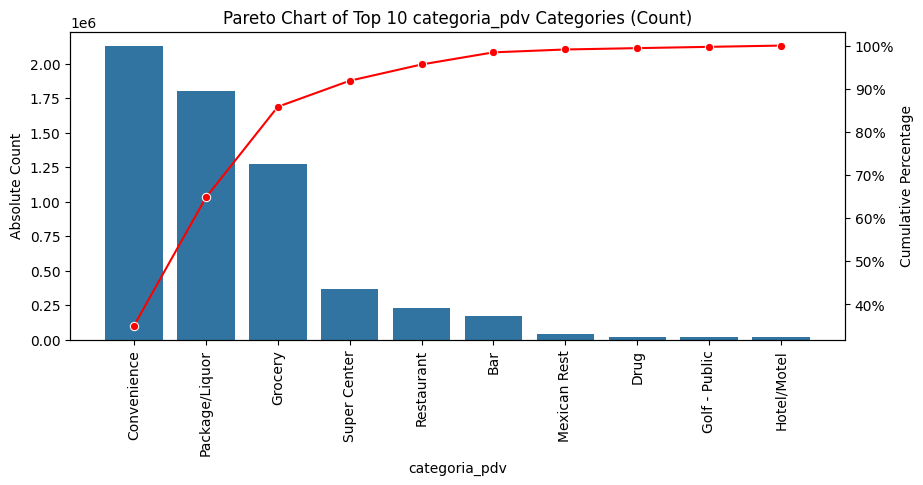

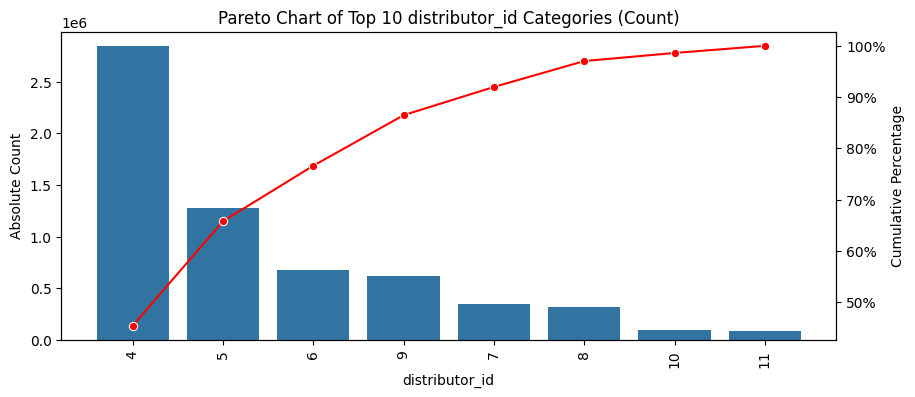

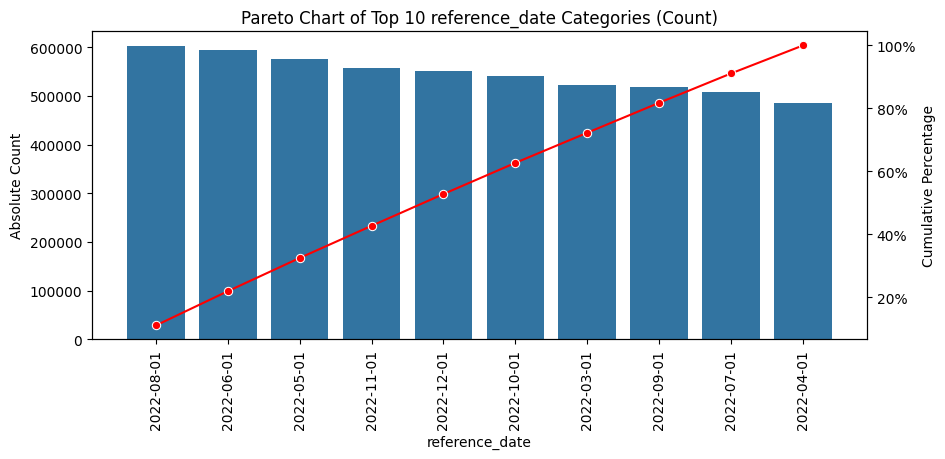

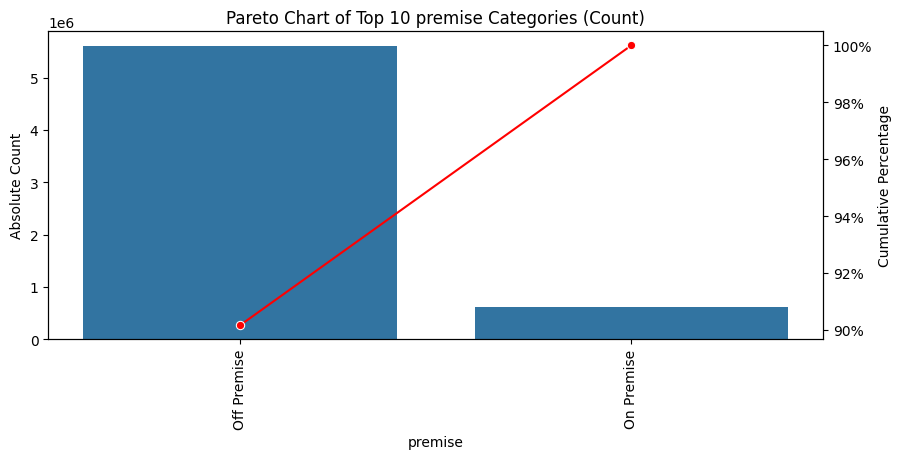

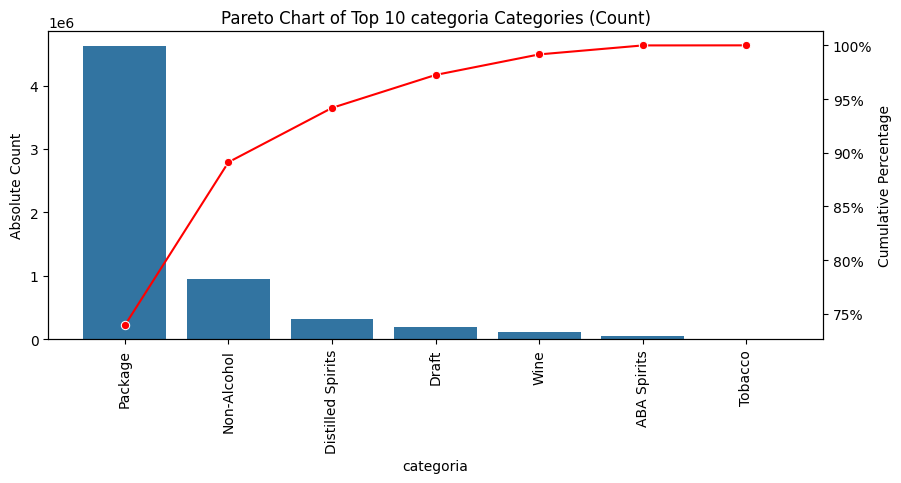

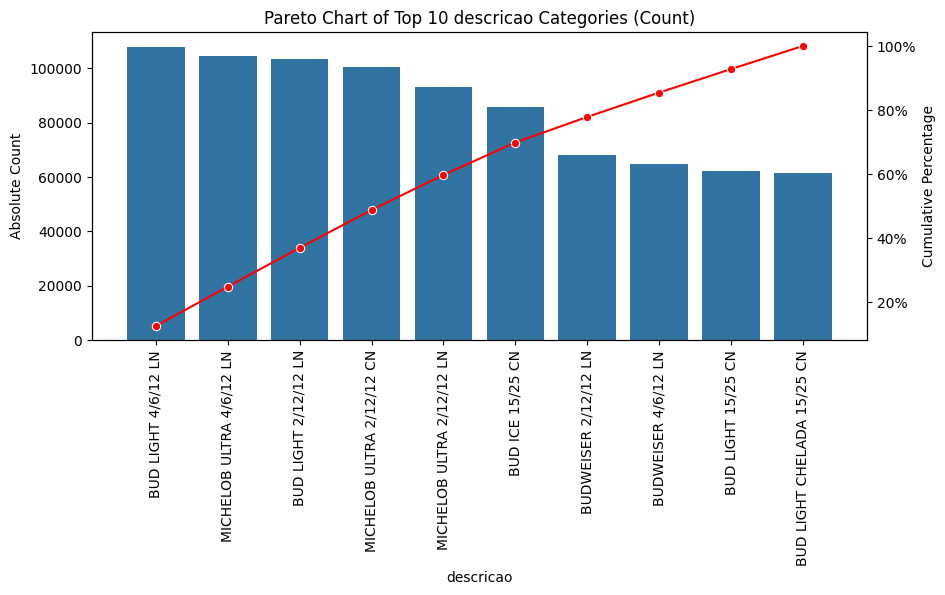

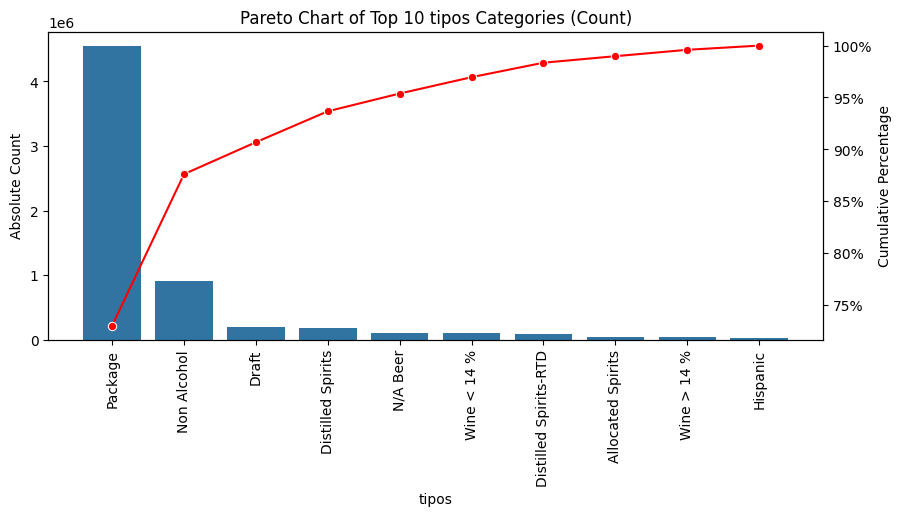

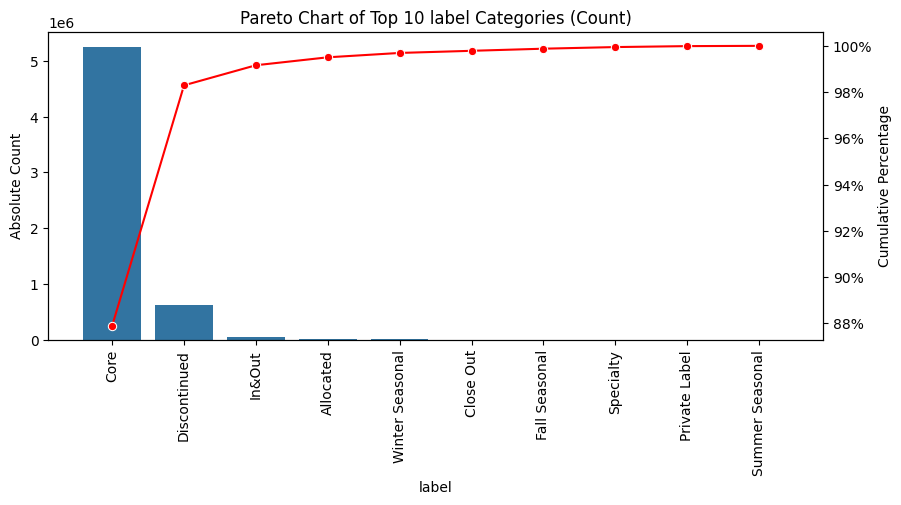

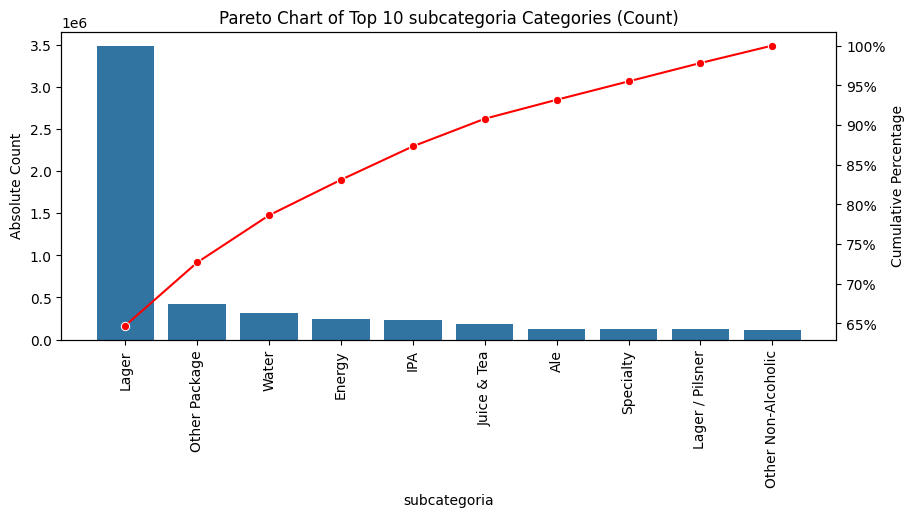

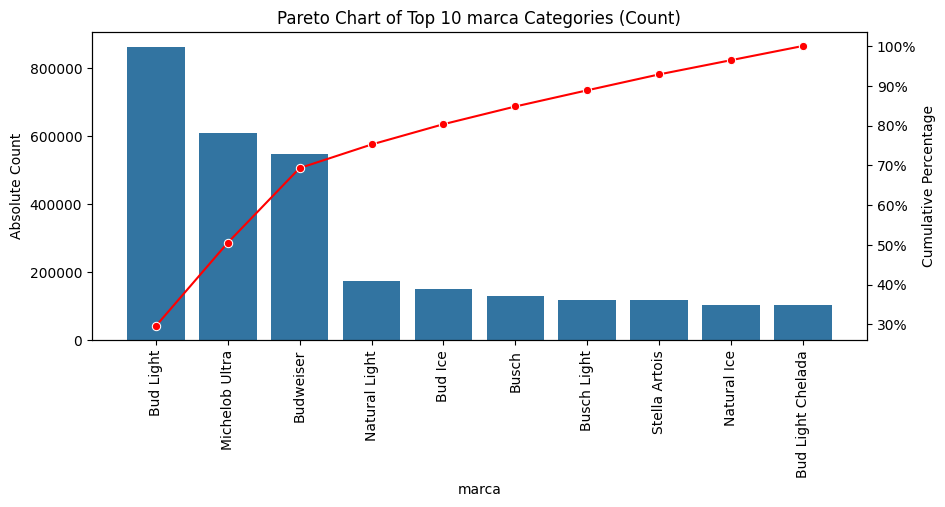

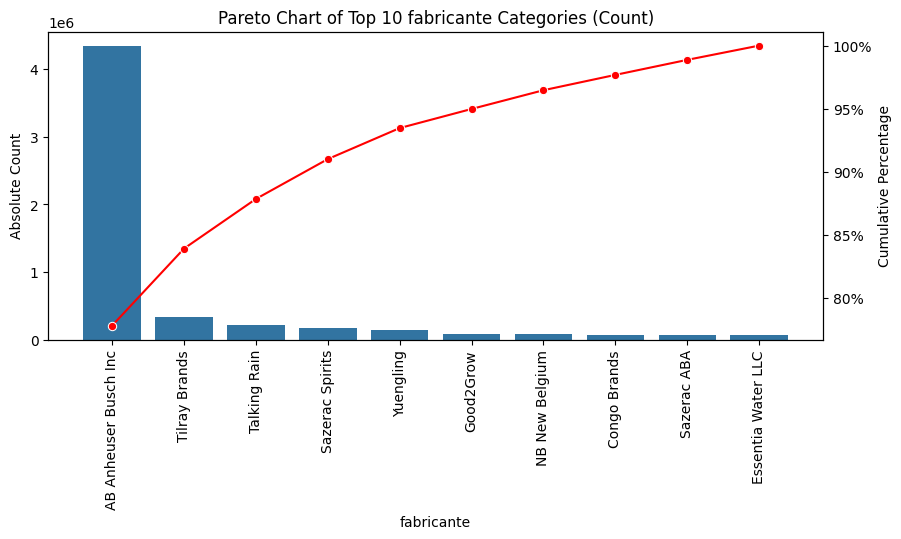

In [ ]:
for column in columns_to_plot:
    generate_pareto_chart(df[df.transaction_date != '2022-09-11'], column, k=10)

### **SUBTASK 2**: Measuring the **AMOUNT SOLD**, using the quantity sold per category (column) that happen through 2022.

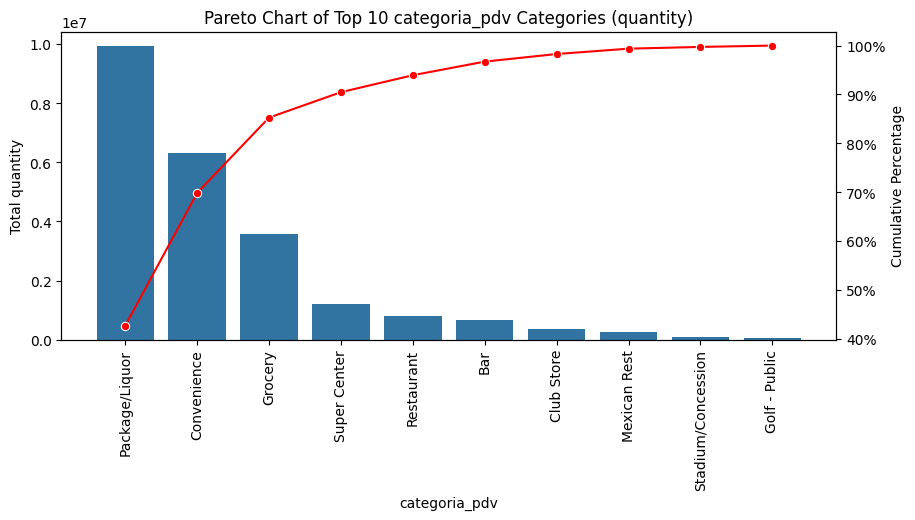

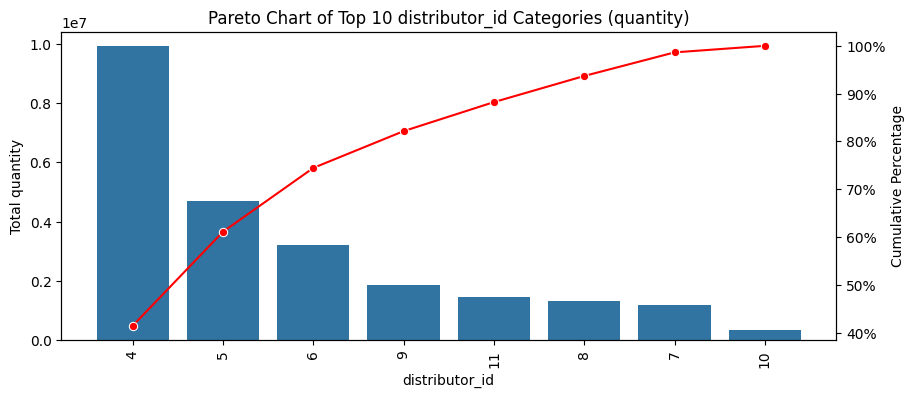

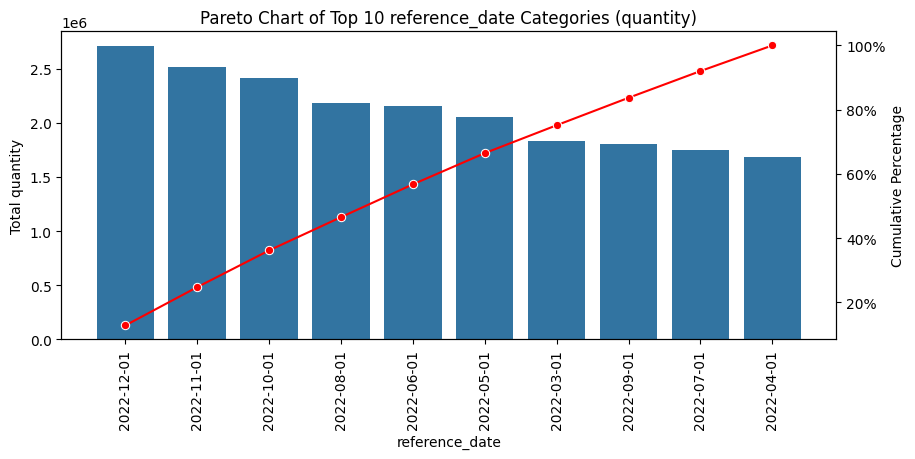

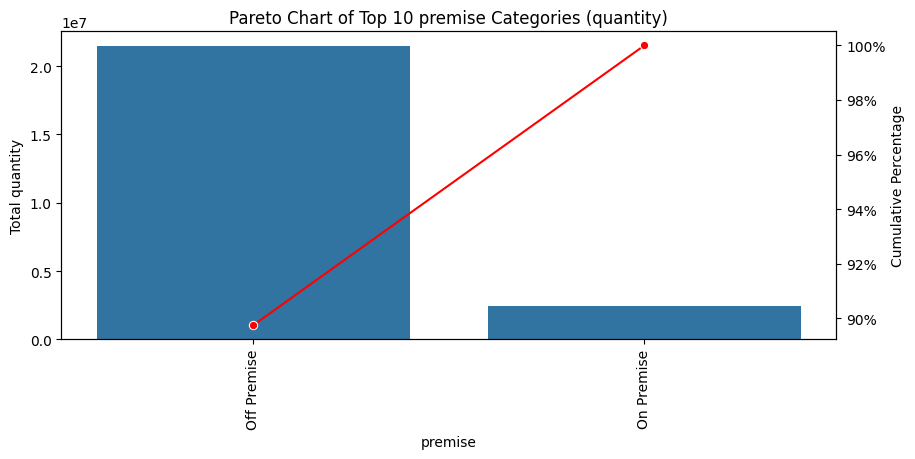

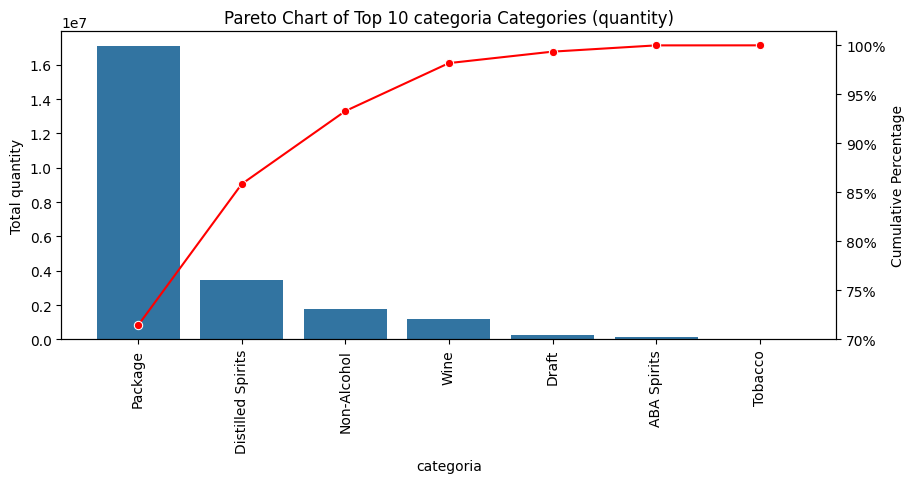

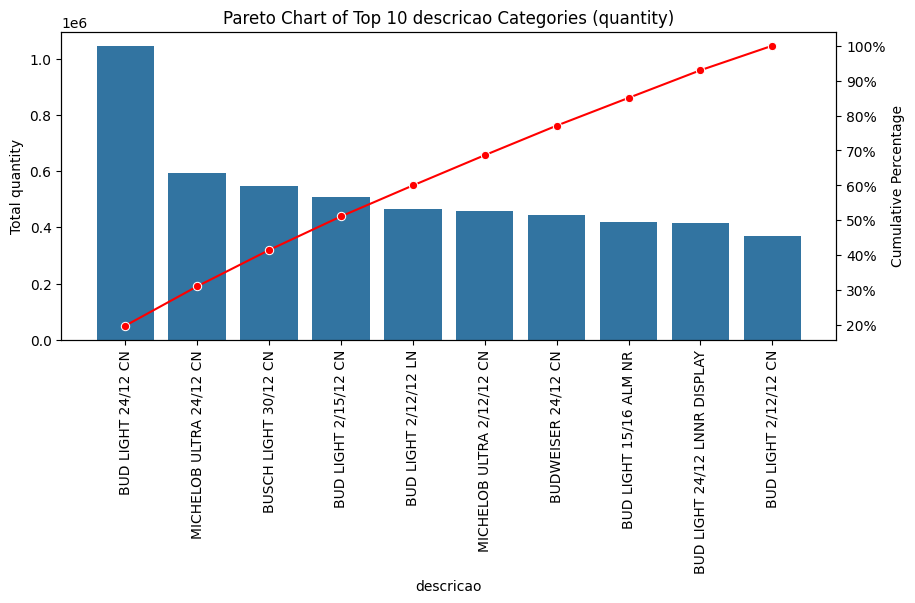

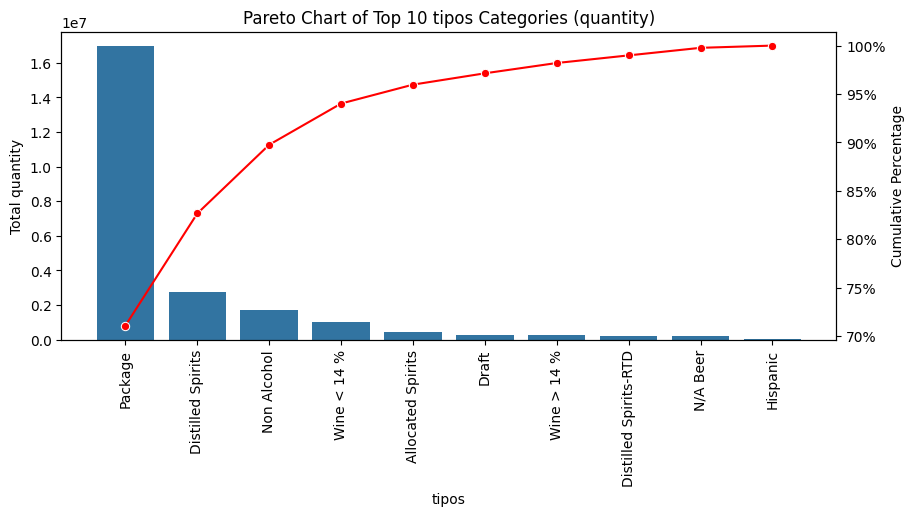

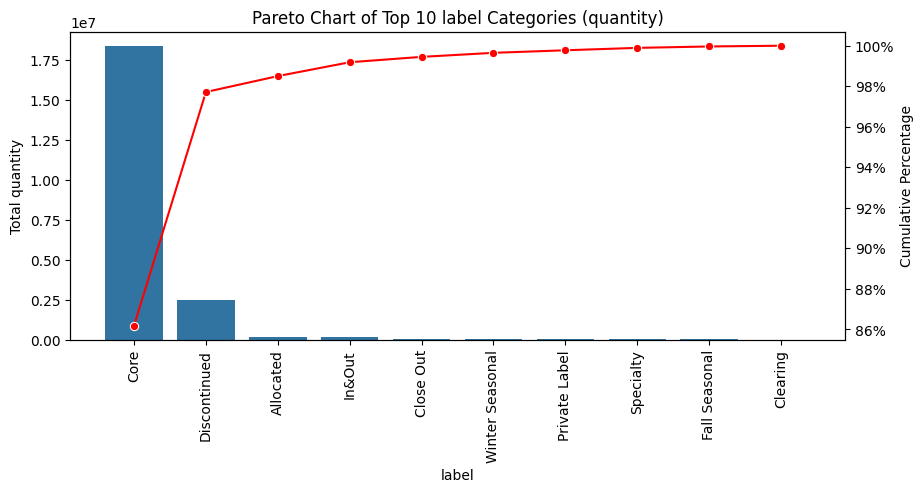

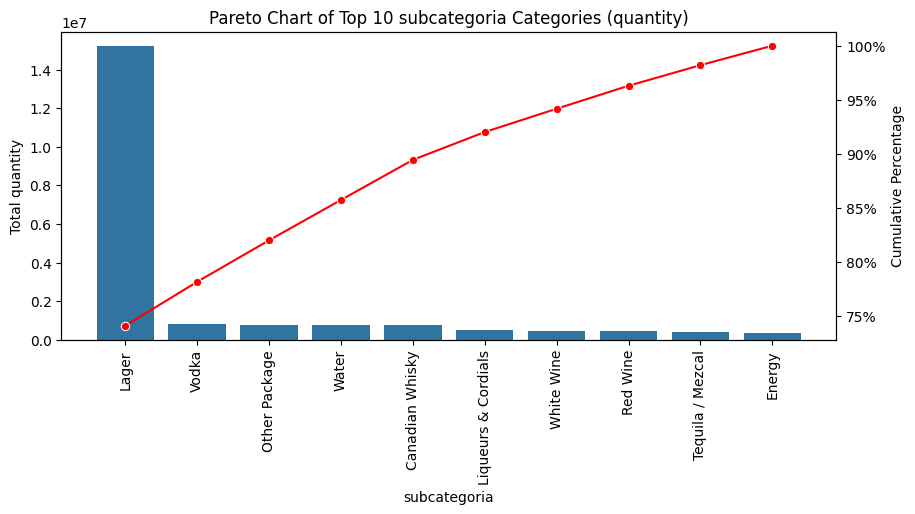

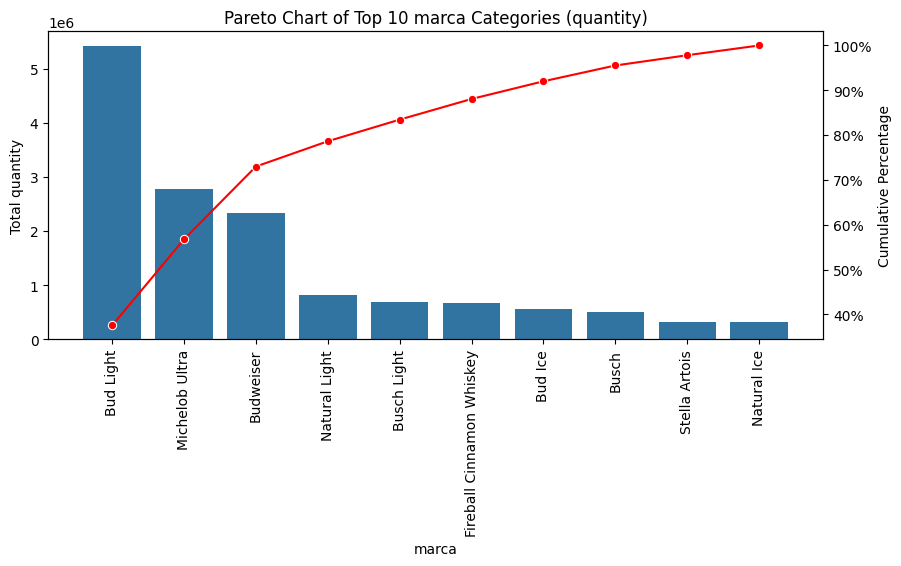

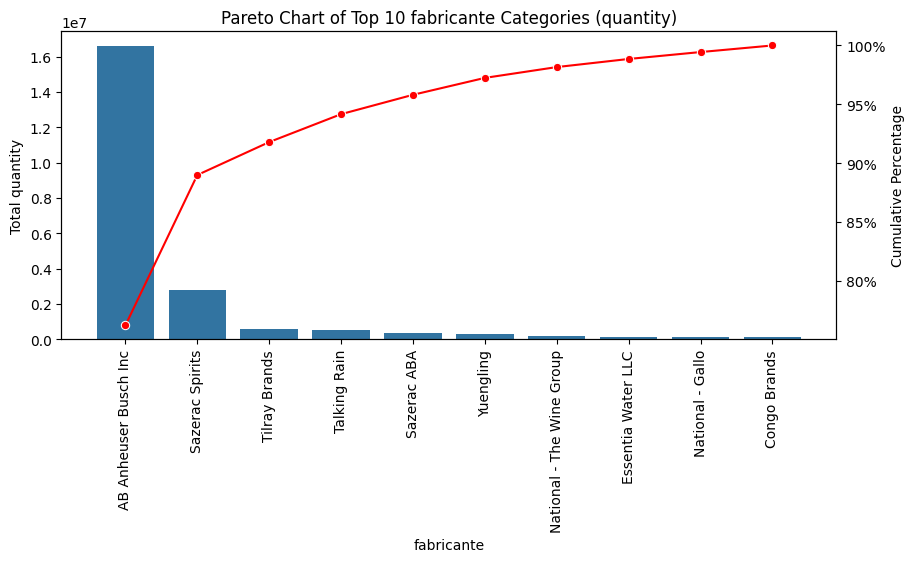

In [ ]:
for column in columns_to_plot:
    generate_pareto_chart(df[df.transaction_date != '2022-09-11'], column, k=10, value_column='quantity')

### **SUBTASK 3**: Measuring **TAXES**, using the distributors and products which yeild the most of the taxes.

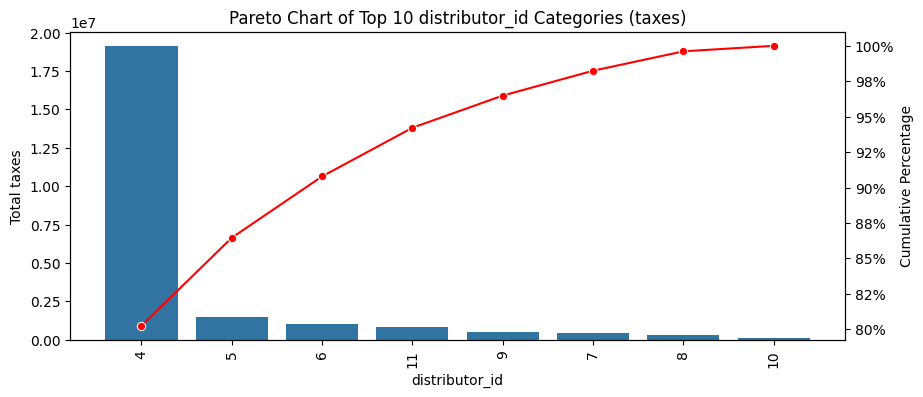

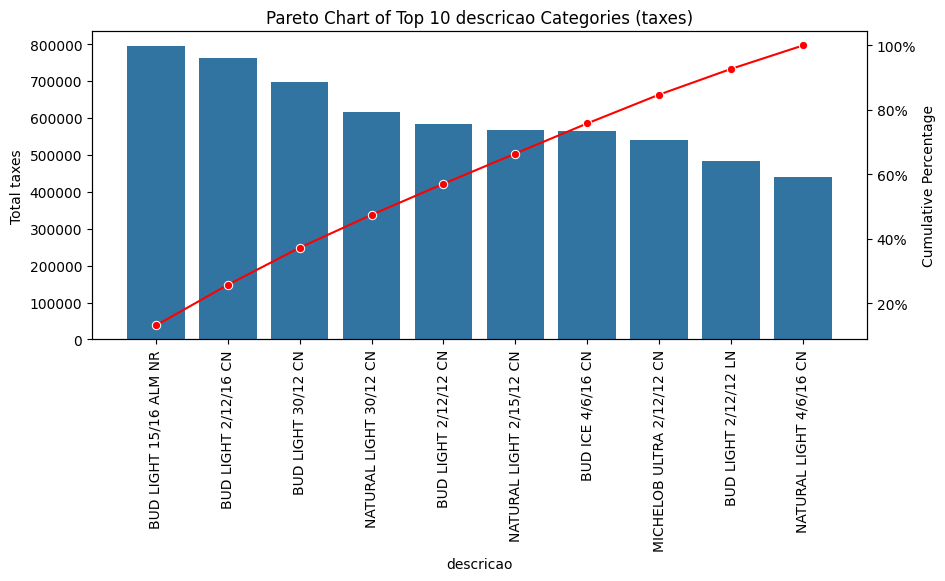

In [ ]:
generate_pareto_chart(df[df.transaction_date != '2022-09-11'], 'distributor_id', k=10, value_column='taxes')
generate_pareto_chart(df[df.transaction_date != '2022-09-11'], 'descricao', k=10, value_column='taxes')

# CONCLUSION

## Data Analysis Key Findings
* Dataset has around **6.5M rows** estimated for the final dataframe, with around **23 columns**, and around **14K stores** and **7K products**
* **No issues with duplicates**
* **Few missings**

* **Summarizing Numeric Description:**
    - **quantity:** mean around **8 products** with a **80 standard deviation**, very high variance, with **negative values** and **very high values after percentile 75%**
    - The other values related with the quantity (gross value/profit, net value, discount, and taxes) have the same tendency

* **Summarizing Categorical Description:**

    - All categorical variables have a low number of unique values, except for the products and stores ids, transaction_date, descricao and marca.
    - **internal_store_id:** there are more stores in the sales table than in the stores dimension which register the existing stores, suggesting the operation of stores not registered in the system
    - **transaction_date and reference_date:** there is huge amounts of sales in september (investigate)
    - **premise:** highly umbalanced for **Off Premise**
    - **categoria_pdv:** highly umbalanced for **Convenience**
    - **categoria:** highly umbalanced for **Package**
    - **tipos:** highly umbalanced for **Package**, this describes a little bit more the categories than **categoria**, this two are someway redundant
    - **label:** highly umbalance for **Core**
    - **subcategoria:** highly umbalance for **Larger**
    - **marca:** highly umbalance for **Bug Light**
    - **fabricante:** highly umbalance for **AB Anheuser Busch Inc**
* High peak in **11th September 2022**, with too much products and stores compared to the remainder, and the most sold products in this period are **Whiskey drinks**
* The quantity of sales, products sold and stores selling, in general looks to increase gradatively from January to December 2022

## Insights or Next Steps

* Treat the high values of Setember is a MUST-HAVE
* Treat the Discontinued items is also a MUST-HAVE
* Eliminate some missings which are not that much
* Considering some standardization of the items to escape from the umbalance